In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [14]:
#data_dir = "G:\\1_Data1\\93_BaikalJun2023Sea\\meteo\\"
#data_dir = "G:\\1_Data1\\90_BaikalJun2022Sea\\Meteo\\"
#data_dir = "G:\\1_Data1\\98_BaikalJul2024Sea\\origin\\"
#data_dir = r'c:\Users\redmi\1_Data1\sea\meteo'
data_dir = r'G:\\1_Data1\\sea\\meteo'
pwd = data_dir
data_files = glob.glob(pwd + r"\*.txt")
data_files

['G:\\\\1_Data1\\\\sea\\\\meteo\\20210602_0651_049.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20210604_0846_049.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20210604_1609_049.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20210606_2150_049.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20210606_2153_049.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20210610_0900_049.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20210610_2351_049.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20210611_1425_049.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20210612_0058_049.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20210612_1603_049.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20220528_2003_049_4m.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20220530_1934_049_4m.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20220601_1802_049_4m.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20220601_1804_049_4m.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20220602_0727_049_4m.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20220608_0812_049_4m.txt',
 'G:\\\\1_Data1\\\\sea\\\\meteo\\20220609_0022_049_4m.txt',
 'G:\\\\1_

In [81]:
f=data_files[1]
df = pd.read_csv(f,
                 encoding_errors='ignore',
                 header=None,
                 skiprows=[0],
                 engine='python',
                 skipfooter=1,
                 sep=' ',
                 names=['date', 'time', 'Temp', 'Wh', 'Wdir', 'vx', 'vy', 'vz', 'Press', 'RH'],
                 #parse_dates={'DateTime':['date', 'time']},
                 #dayfirst=True,
                 on_bad_lines='skip',
                )
df['DateTime'] = pd.to_datetime(df['date'] + ' ' + df['time'], dayfirst=True, cache=True)

df.resample('1min', on='DateTime').agg({'vx':'mean', 'vy':'mean', 'Temp':'mean', 'RH': 'mean', 'Press': 'mean', 'Wh':lambda x:x, 'Wdir':lambda x:x})

,vx,vy,Temp,RH,Press,Wh,Wdir
DateTime,,,,,,,
2021-06-04 08:46:00,0.135,-0.195,7.858,47.2,716.6,0.259,235.3
2021-06-04 08:47:00,0.078,-0.174,8.659,46.6,716.6,0.256,245.7
2021-06-04 08:48:00,0.064,-0.032,9.287,46.1,716.6,0.215,206.7
2021-06-04 08:49:00,-0.220,0.223,10.330,45.3,716.6,0.346,45.4
2021-06-04 08:50:00,-0.297,0.212,10.147,44.5,716.6,0.386,35.6
...,...,...,...,...,...,...,...
2021-06-04 15:57:00,0.854,3.679,5.282,76.3,712.9,3.874,103.1
2021-06-04 15:58:00,0.374,4.500,4.646,77.1,712.9,4.569,94.8
2021-06-04 15:59:00,0.113,4.337,4.604,79.0,712.9,4.399,91.5


In [82]:
dfl = []
for f in data_files:
    df = pd.read_csv(f,
                     encoding_errors='ignore',
                     header=None,
                     skiprows=[0],
                     engine='python',
                     skipfooter=1,
                     sep=' ',
                     names=['date', 'time', 'Temp', 'Wh', 'Wdir', 'vx', 'vy', 'vz', 'Press', 'RH'],
                     #parse_dates={'DateTime':['date', 'time']},
                     #dayfirst=True,
                     on_bad_lines='skip',
                    )
    df['DateTime'] = pd.to_datetime(df['date'] + ' ' + df['time'], dayfirst=True, cache=True)
    df = df.resample('1min', on='DateTime').agg({'vx':'mean', 'vy':'mean', 'Temp':'mean', 'RH': 'mean', 'Press': 'mean', 'Wh':lambda x:x, 'Wdir':lambda x:x})
    
    dfl.append(df)
    del(df)
df = pd.concat(dfl)

C:\Users\pestu\AppData\Local\Temp\ipykernel_11544\2330682570.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfl)


In [83]:
df

,vx,vy,Temp,RH,Press,Wh,Wdir
DateTime,,,,,,,
2021-06-02 06:51:00,-1.955,2.014,5.641,100.0,724.2,2.84,45.8
2021-06-02 06:52:00,-0.861,1.847,4.198,100.0,724.2,2.129,65.0
2021-06-02 06:53:00,-1.390,1.189,4.200,99.2,724.1,1.955,40.5
2021-06-02 06:54:00,-2.015,0.162,4.448,99.2,724.0,2.06,4.6
2021-06-02 06:55:00,-2.101,0.424,5.173,99.9,723.9,2.189,11.4
...,...,...,...,...,...,...,...
2024-08-05 14:49:00,-1.809,-0.700,21.882,39.3,714.6,1.959,338.8
2024-08-05 14:50:00,-1.706,-0.884,21.798,40.5,714.5,1.987,332.6
2024-08-05 14:51:00,-2.359,-0.374,21.891,39.1,714.5,2.441,351.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83707 entries, 2021-06-02 06:51:00 to 2024-08-05 14:53:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   vx      82048 non-null  float64
 1   vy      82048 non-null  float64
 2   Temp    82048 non-null  float64
 3   RH      82048 non-null  float64
 4   Press   82048 non-null  float64
 5   Wh      83707 non-null  object 
 6   Wdir    83707 non-null  object 
dtypes: float64(5), object(2)
memory usage: 5.1+ MB


In [85]:
df.sort_values(by='DateTime', inplace=True)
df

,vx,vy,Temp,RH,Press,Wh,Wdir
DateTime,,,,,,,
2021-06-02 06:51:00,-1.955,2.014,5.641,100.0,724.2,2.84,45.8
2021-06-02 06:52:00,-0.861,1.847,4.198,100.0,724.2,2.129,65.0
2021-06-02 06:53:00,-1.390,1.189,4.200,99.2,724.1,1.955,40.5
2021-06-02 06:54:00,-2.015,0.162,4.448,99.2,724.0,2.06,4.6
2021-06-02 06:55:00,-2.101,0.424,5.173,99.9,723.9,2.189,11.4
...,...,...,...,...,...,...,...
2024-08-05 14:49:00,-1.809,-0.700,21.882,39.3,714.6,1.959,338.8
2024-08-05 14:50:00,-1.706,-0.884,21.798,40.5,714.5,1.987,332.6
2024-08-05 14:51:00,-2.359,-0.374,21.891,39.1,714.5,2.441,351.0


In [86]:
def filter_df(df):
    pass

In [89]:
df.columns

Index(['vx', 'vy', 'Temp', 'RH', 'Press', 'Wh', 'Wdir'], dtype='object')

In [87]:
df.plot(x='DateTime', y=['Temp', 'RH'], subplots=True)

KeyError: 'DateTime'

array([<Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>], dtype=object)

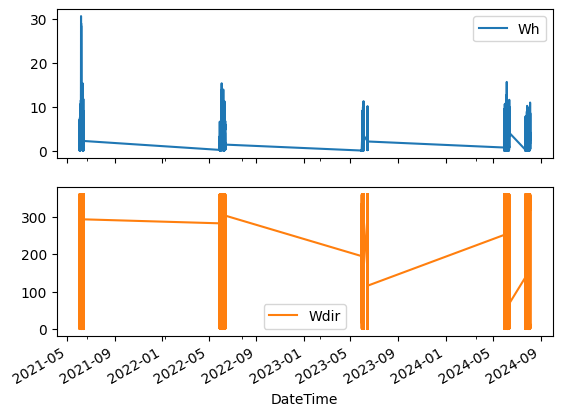

In [21]:
df.plot(x='DateTime', y=['Wh', 'Wdir'], subplots=True)

In [59]:
df.to_csv(pwd+'//..//meteo.txt', sep='\t')

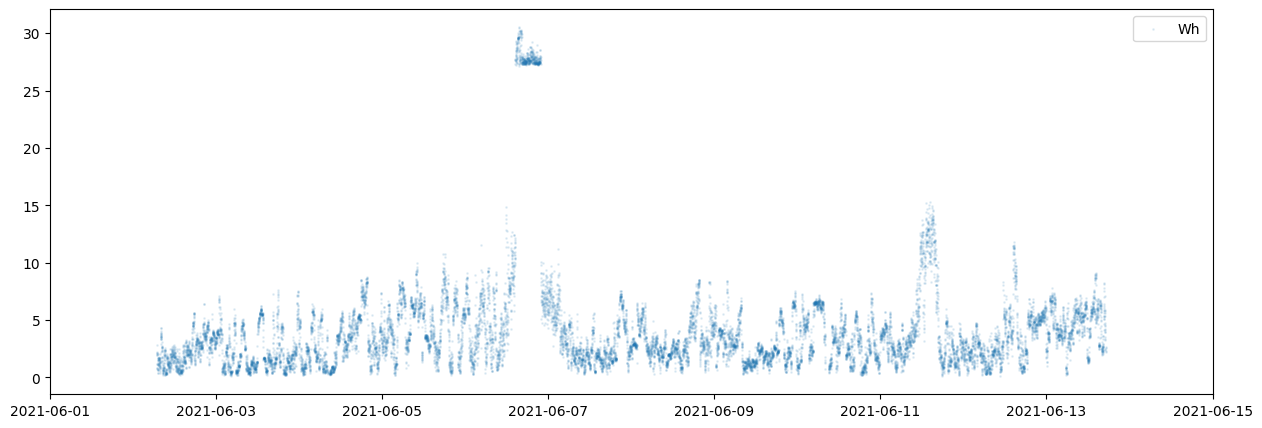

In [22]:
plt.rcParams['figure.figsize']=[15, 5]
plt.scatter('DateTime', 'Wh', data=df, s=1, alpha=0.1)
plt.xlim(pd.to_datetime('2021-06-01 00:00'), pd.to_datetime('2021-06-15 00:00'))
plt.legend()

In [23]:
dfm=df.copy()

In [25]:
df = pd.read_csv('G:/1_Data1/sea/AllSea.txt',
                 header=0,
                 # skip_blank_lines=True,
                 skipinitialspace=True,
                 #na_values='--',
                 sep='\t',
                 decimal='.',
                 # nrows=100000,
                 parse_dates=['DateTime'],
                 dayfirst=False
                )


In [26]:
colstoleft = ['DateTime', 'Longitude', 'Latitude', 'Speed', 'Course']

In [27]:
df.drop([i for i in df.columns if i not in colstoleft],axis='columns', errors='ignore', inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445736 entries, 0 to 445735
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   DateTime   445736 non-null  datetime64[ns]
 1   Longitude  445736 non-null  float64       
 2   Latitude   445736 non-null  float64       
 3   Speed      63977 non-null   float64       
 4   Course     63971 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.0 MB


In [29]:
df = pd.merge(left=df, right=dfm, left_on='DateTime', right_on='DateTime', how='outer')

In [38]:
df.sort_values(by='DateTime', inplace=True)
df.reset_index(drop=True, inplace=True)

ValueError: 'DateTime' is both an index level and a column label, which is ambiguous.

In [31]:
df.dropna(subset=['DateTime'], axis='index')


,DateTime,Longitude,Latitude,Speed,Course,date,time,Temp,Wh,Wdir,vx,vy,vz,Press,RH
0,2013-05-28 22:00:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-05-28 22:01:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-05-28 22:02:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-28 22:03:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-05-28 22:04:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524707,2024-08-05 14:49:14,NaN,NaN,NaN,NaN,05.08.2024,14:49:14,21.882,1.959,338.8,-1.809,-0.700,0.093,714.6,39.3
524708,2024-08-05 14:50:14,NaN,NaN,NaN,NaN,05.08.2024,14:50:14,21.798,1.987,332.6,-1.706,-0.884,0.165,714.5,40.5
524709,2024-08-05 14:51:14,NaN,NaN,NaN,NaN,05.08.2024,14:51:14,21.891,2.441,351.0,-2.359,-0.374,-0.124,714.5,39.1
524710,2024-08-05 14:52:14,NaN,NaN,NaN,NaN,05.08.2024,14:52:14,21.947,2.477,349.0,-2.388,-0.466,-0.142,714.5,37.9


In [32]:
len(set(df['DateTime']))

524709

In [34]:
df['Lat'] = df['Latitude']#.rolling(3, min_periods=1, center=True).mean()
df['Long'] = df['Longitude']#.rolling(3, min_periods=1, center=True).mean()

In [36]:
df.index = df['DateTime']
df

,DateTime,Longitude,Latitude,Speed,Course,date,time,Temp,Wh,Wdir,vx,vy,vz,Press,RH,Lat,Long
DateTime,,,,,,,,,,,,,,,,,
2013-05-28 22:00:38,2013-05-28 22:00:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.781395,104.649879
2013-05-28 22:01:38,2013-05-28 22:01:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.781395,104.649879
2013-05-28 22:02:38,2013-05-28 22:02:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.781395,104.649879
2013-05-28 22:03:38,2013-05-28 22:03:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.781395,104.649879
2013-05-28 22:04:38,2013-05-28 22:04:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.781395,104.649879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05 14:49:14,2024-08-05 14:49:14,NaN,NaN,NaN,NaN,05.08.2024,14:49:14,21.882,1.959,338.8,-1.809,-0.700,0.093,714.6,39.3,NaN,NaN
2024-08-05 14:50:14,2024-08-05 14:50:14,NaN,NaN,NaN,NaN,05.08.2024,14:50:14,21.798,1.987,332.6,-1.706,-0.884,0.165,714.5,40.5,NaN,NaN
2024-08-05 14:51:14,2024-08-05 14:51:14,NaN,NaN,NaN,NaN,05.08.2024,14:51:14,21.891,2.441,351.0,-2.359,-0.374,-0.124,714.5,39.1,NaN,NaN


In [37]:
df['Lat'] = df['Lat'].interpolate(method='time')
df['Long'] = df['Long'].interpolate(method='time')

In [40]:
df.reset_index(drop=True)

,DateTime,Longitude,Latitude,Speed,Course,date,time,Temp,Wh,Wdir,vx,vy,vz,Press,RH,Lat,Long
0,2013-05-28 22:00:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.781395,104.649879
1,2013-05-28 22:01:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.781395,104.649879
2,2013-05-28 22:02:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.781395,104.649879
3,2013-05-28 22:03:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.781395,104.649879
4,2013-05-28 22:04:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.781395,104.649879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524707,2024-08-05 14:49:14,NaN,NaN,NaN,NaN,05.08.2024,14:49:14,21.882,1.959,338.8,-1.809,-0.700,0.093,714.6,39.3,51.877020,105.040191
524708,2024-08-05 14:50:14,NaN,NaN,NaN,NaN,05.08.2024,14:50:14,21.798,1.987,332.6,-1.706,-0.884,0.165,714.5,40.5,51.877020,105.040191
524709,2024-08-05 14:51:14,NaN,NaN,NaN,NaN,05.08.2024,14:51:14,21.891,2.441,351.0,-2.359,-0.374,-0.124,714.5,39.1,51.877020,105.040191
524710,2024-08-05 14:52:14,NaN,NaN,NaN,NaN,05.08.2024,14:52:14,21.947,2.477,349.0,-2.388,-0.466,-0.142,714.5,37.9,51.877020,105.040191


In [41]:
df['mywindspeed'] = np.sqrt(np.power(df['vx'],2)+np.power(df['vy'],2))

In [42]:
df['mywinddir'] = np.arctan2(-df['vy'], df['vx']) * 180 / np.pi + 180

(np.float64(18779.0), np.float64(18793.0))

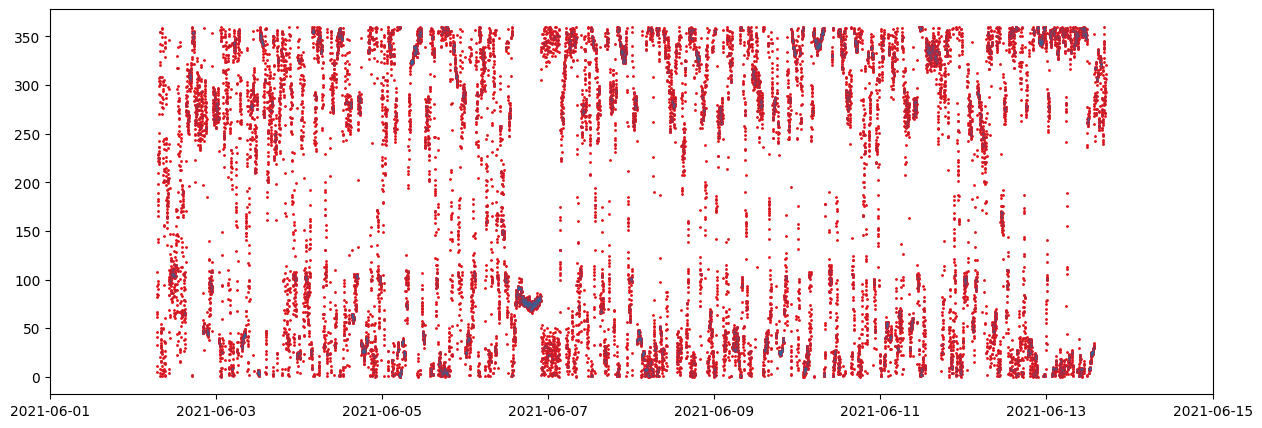

In [43]:
plt.rcParams['figure.figsize']=[15, 5]
plt.scatter('DateTime', 'mywinddir', data=df, s=1, c='red')
plt.scatter('DateTime', 'Wdir', data=df, s=1, alpha=0.1)
plt.xlim(pd.to_datetime('2021-06-01 00:00'), pd.to_datetime('2021-06-15 00:00'))

In [44]:
df['DateSec'] = df['DateTime'].astype('int64')/10**9
df['dt'] = df['DateSec'].shift(-1) - df['DateSec'].shift(1)

In [45]:
R_EARTH = 6371000  #meters
df['vesselvy'] = (df['Lat'].shift(-1) - df['Lat'].shift(1)) * 2 * np.pi * R_EARTH / 360
df['vesselvx'] = (df['Long'].shift(-1) - df['Long'].shift(1)) * (np.cos(df['Lat'] * np.pi / 180 ) * 2 * np.pi * R_EARTH/360)
df['vesselspeed'] = np.sqrt(np.power(df['vesselvy'],2) + np.power(df['vesselvx'],2))/df['dt']
df.describe()

,DateTime,Longitude,Latitude,Speed,Course,Temp,Wh,Wdir,vx,vy,...,RH,Lat,Long,mywindspeed,mywinddir,DateSec,dt,vesselvy,vesselvx,vesselspeed
count,524712,445736.000000,445736.000000,63977.000000,63971.000000,82056.000000,82056.000000,82056.000000,82056.000000,82056.000000,...,82056.000000,524712.000000,524712.000000,82056.000000,82056.000000,5.247120e+05,5.247100e+05,524710.000000,524710.000000,524710.000000
mean,2020-08-24 12:18:54.923479552,107.164331,53.170741,2.264219,104.958258,9.089555,3.535537,191.304085,-1.914326,-0.052145,...,83.371441,53.112101,107.065557,3.471352,191.286776,1.598272e+09,1.345852e+03,0.040529,0.135308,2.141321
min,2013-05-28 22:00:38,103.752400,51.504091,0.017000,0.000000,-13.156000,0.053000,0.000000,-15.210000,-10.099000,...,23.900000,51.504091,103.752400,0.001414,0.000000,1.369778e+09,1.000000e+00,-126106.944672,-150153.638402,0.000000
25%,2017-05-30 19:16:04,105.397423,51.899628,0.196000,0.000000,4.849000,1.592000,63.300000,-3.686000,-1.659000,...,76.300000,51.877020,105.244261,1.499501,63.288115,1.496172e+09,2.000000e+01,-15.270299,-8.160328,0.083413
50%,2021-06-10 23:13:20,107.465817,53.021507,2.929650,51.064100,6.709000,2.999000,238.500000,-1.223000,-0.195000,...,85.400000,52.938538,107.250400,2.957911,238.434887,1.623367e+09,3.800000e+01,0.000000,0.000000,2.389109
75%,2023-06-08 16:51:45,108.844707,54.064425,4.167870,211.219500,13.592500,4.861000,311.600000,0.079000,1.318000,...,93.800000,53.940700,108.760300,4.825329,311.643639,1.686243e+09,4.000000e+01,16.118649,16.679241,4.199415
max,2024-08-05 14:53:15,109.870200,55.768120,4.664000,359.778000,33.559000,30.563000,360.000000,9.250000,30.550000,...,100.000000,55.768120,109.870200,30.550303,359.990391,1.722870e+09,9.431542e+07,9430.682389,7782.607933,59.423373
std,NaN,1.835688,1.280048,1.818231,118.144217,5.612533,2.917592,125.500877,2.661189,3.153938,...,13.932341,1.278640,1.844373,2.940447,125.501989,1.038361e+08,2.911839e+05,310.639211,408.299809,1.978989


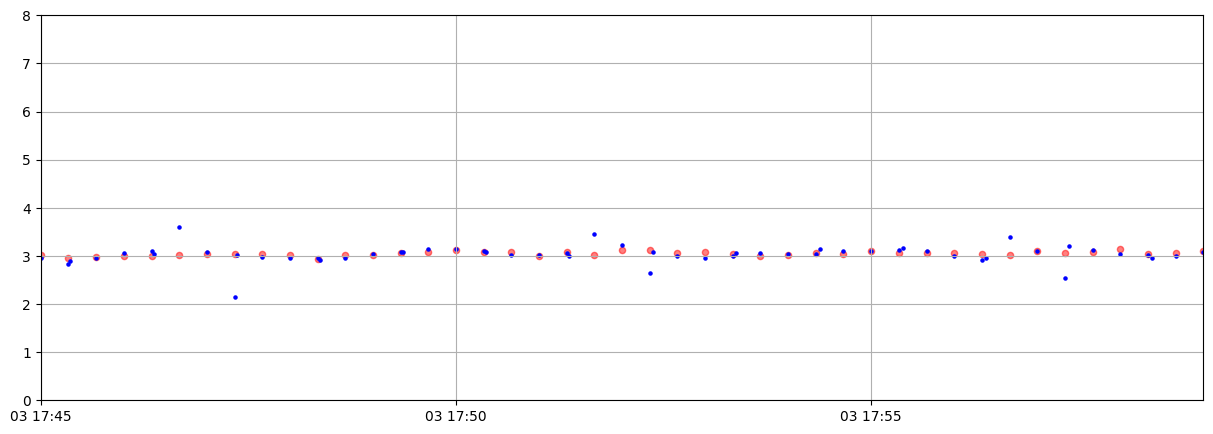

In [58]:
plt.scatter('DateTime', 'Speed', data=df, c='red', s=20, alpha=0.5)
plt.scatter('DateTime', 'vesselspeed', data=df, c='blue', s=5)
plt.xlim(pd.to_datetime('2023-06-03 12:00'), pd.to_datetime('2023-06-04 0:00'))
plt.xlim(pd.to_datetime('2023-06-03 17:45'), pd.to_datetime('2023-06-03 17:59'))

plt.ylim(0, 8)
plt.grid()

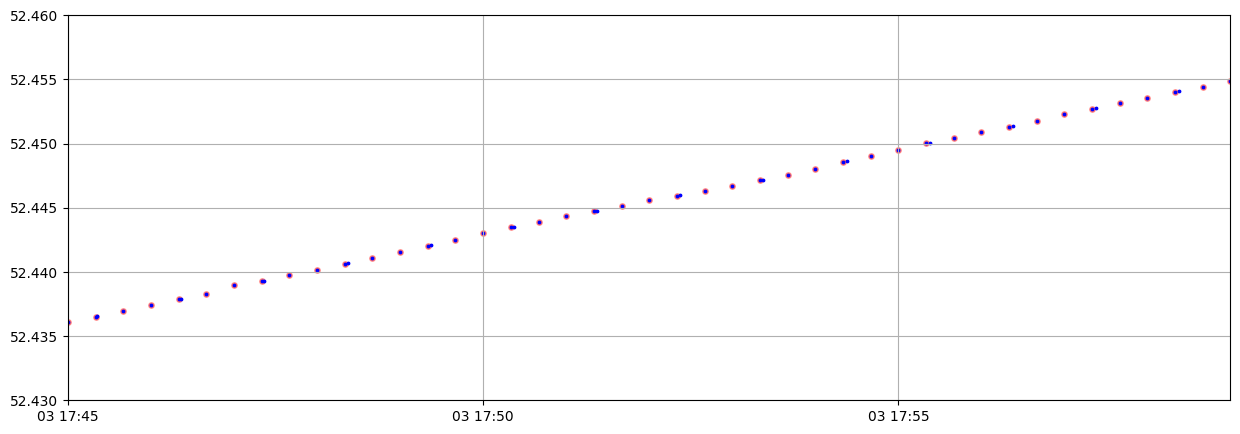

In [60]:
plt.scatter('DateTime', 'Latitude', data=df, c='red', s=15, alpha=0.4)
plt.scatter('DateTime', 'Lat', data=df, c='blue', s=3, alpha=1)
plt.xlim(pd.to_datetime('2023-06-03 17:25'), pd.to_datetime('2023-06-03 17:35'))
plt.xlim(pd.to_datetime('2023-06-03 17:45'), pd.to_datetime('2023-06-03 17:59'))

plt.ylim(52.43, 52.46)
plt.grid()

In [63]:
df.loc[(df['DateTime'] > pd.to_datetime('2023-06-03 17:45')) & (df['DateTime'] < pd.to_datetime('2023-06-03 17:59')), ['DateTime', 'Longitude', 'Latitude', 'Long', 'Lat', 'vesselspeed', 'dt', 'vx']]

,DateTime,Longitude,Latitude,Long,Lat,vesselspeed,dt,vx
DateTime,,,,,,,,
2023-06-03 17:45:20,2023-06-03 17:45:20,105.978426,52.436522,105.978426,52.436522,2.838159,21.0,NaN
2023-06-03 17:45:21,2023-06-03 17:45:21,NaN,NaN,105.978400,52.436543,2.902451,20.0,2.080
2023-06-03 17:45:40,2023-06-03 17:45:40,105.977913,52.436940,105.977913,52.436940,2.965731,39.0,NaN
2023-06-03 17:46:00,2023-06-03 17:46:00,105.977401,52.437386,105.977401,52.437386,3.063148,40.0,NaN
2023-06-03 17:46:20,2023-06-03 17:46:20,105.976901,52.437853,105.976901,52.437853,3.094292,22.0,NaN
2023-06-03 17:46:22,2023-06-03 17:46:22,NaN,NaN,105.976854,52.437900,3.033108,20.0,2.090
2023-06-03 17:46:40,2023-06-03 17:46:40,105.976433,52.438318,105.976433,52.438318,3.592014,38.0,NaN
2023-06-03 17:47:00,2023-06-03 17:47:00,105.975799,52.438945,105.975799,52.438945,3.072840,40.0,NaN
2023-06-03 17:47:20,2023-06-03 17:47:20,105.975495,52.439264,105.975495,52.439264,2.138453,22.0,NaN


In [49]:
df.loc[(df['DateTime'] > pd.to_datetime('2023-06-03 17:30')) & (df['DateTime'] < pd.to_datetime('2023-06-03 17:35')), ['DateTime', 'vx', 'Longitude', 'Latitude', 'Long', 'Lat', 'dt']]

,DateTime,vx,Longitude,Latitude,Long,Lat,dt
DateTime,,,,,,,
2023-06-03 17:30:20,2023-06-03 17:30:20,2.013,106.001957,52.416218,106.001957,52.416218,40.0
2023-06-03 17:30:40,2023-06-03 17:30:40,NaN,106.001452,52.416683,106.001452,52.416683,40.0
2023-06-03 17:31:00,2023-06-03 17:31:00,NaN,106.000940,52.417176,106.000940,52.417176,40.0
2023-06-03 17:31:20,2023-06-03 17:31:20,1.050,106.000420,52.417639,106.000420,52.417639,40.0
2023-06-03 17:31:40,2023-06-03 17:31:40,NaN,105.999910,52.418099,105.999910,52.418099,40.0
2023-06-03 17:32:00,2023-06-03 17:32:00,NaN,105.999413,52.418548,105.999413,52.418548,40.0
2023-06-03 17:32:20,2023-06-03 17:32:20,1.837,105.998898,52.419031,105.998898,52.419031,40.0
2023-06-03 17:32:40,2023-06-03 17:32:40,NaN,105.998342,52.419524,105.998342,52.419524,40.0
2023-06-03 17:33:00,2023-06-03 17:33:00,NaN,105.997861,52.419974,105.997861,52.419974,40.0


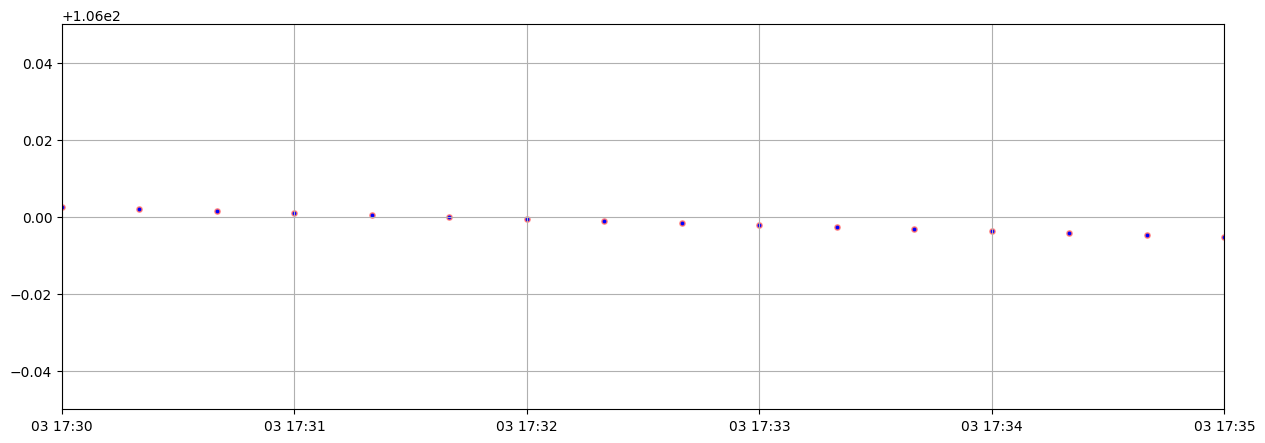

In [50]:
plt.scatter('DateTime', 'Longitude', data=df, c='red', s=15, alpha=0.4)
plt.scatter('DateTime', 'Long', data=df, c='blue', s=3, alpha=1)
plt.xlim(pd.to_datetime('2023-06-03 17:30'), pd.to_datetime('2023-06-03 17:35'))
plt.ylim(105.95, 106.05)
plt.grid()

In [ ]:
df.describe()

In [ ]:
df.interpolate(method ='linear', limit_direction ='forward', limit_area='inside').describe()

In [ ]:
df.describe()